Importing the Libraries

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Processing

In [37]:
# loading the csv data to a Pandas DataFrame
gold_data = pd.read_csv('archive/gld_price_data.csv')

In [38]:
# print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [39]:
# print last 5 rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [40]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [41]:
# getting some basic informations about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [54]:
# checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [43]:
# getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [48]:
# Assuming 'Date' is the name of your date column
gold_data['Date'] = pd.to_datetime(gold_data['Date'])
gold_data['Date'] = gold_data['Date'].dt.year * 10000 + gold_data['Date'].dt.month * 100 + gold_data['Date'].dt.day

In [50]:
gold_data

,Date,SPX,GLD,USO,SLV,EUR/USD
0,19700101,1447.160034,84.860001,78.470001,15.1800,1.471692
1,19700101,1447.160034,85.570000,78.370003,15.2850,1.474491
2,19700101,1411.630005,85.129997,77.309998,15.1670,1.475492
3,19700101,1416.180054,84.769997,75.500000,15.0530,1.468299
4,19700101,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,19700101,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,19700101,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,19700101,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,19700101,2730.129883,124.489998,14.380000,15.5600,1.193118


Correlation:
1. Positive Correlation
2. Negative Correlation

In [51]:
correlation = gold_data.corr()

<Axes: >

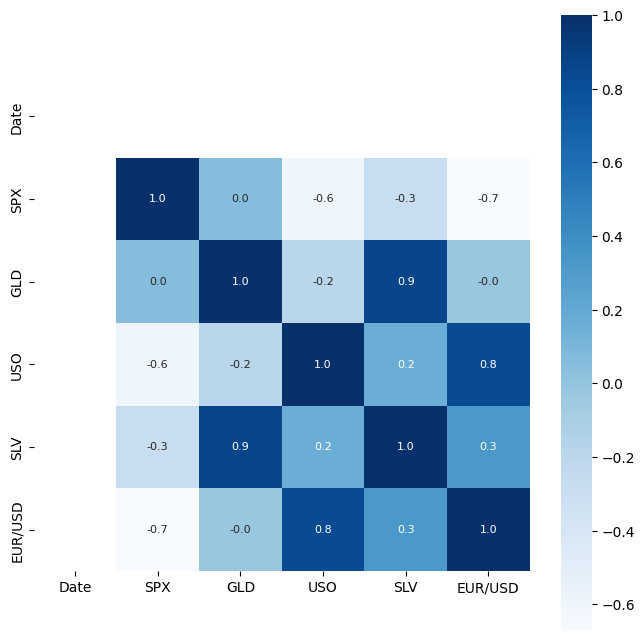

In [52]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [55]:
# correlation values of GLD
print(correlation['GLD'])

Date            NaN
SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\ABC\AppData\Local\Temp\ipykernel_6192\563101706.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

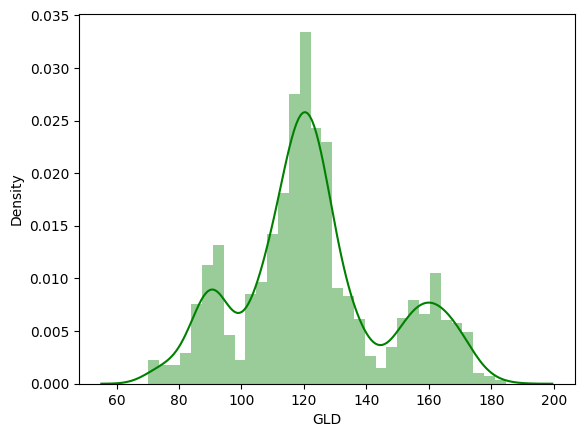

In [56]:
# checking the distribution of the GLD Price
sns.distplot(gold_data['GLD'],color='green')

Splitting the Features and Target

In [57]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [58]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [ ]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Training data and Test Data

In [59]:
#seprate train and validation data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

Model Training:
Random Forest Regressor

In [60]:
regressor = RandomForestRegressor(n_estimators=100)

In [61]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [62]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [63]:
print(test_data_prediction)

[168.41449924  81.65480001 115.4440002  127.85670077 120.60380153
 154.69449825 150.39549846 126.03890036 117.44299868 125.86200078
 116.83530112 172.176501   141.68849889 167.93519793 115.16699998
 117.83440026 137.7216037  169.88980139 160.02040278 157.25589924
 155.26120081 125.1523005  175.60310023 157.53830402 125.14160033
  93.68679941  77.64519997 120.68400025 119.09499945 167.4010998
  88.24940009 125.01189951  91.20950101 117.83240014 121.14239897
 136.71610053 115.57470112 114.9659006  147.31569989 106.87470099
 104.38180246  87.14609768 126.42700053 117.81110005 154.33389894
 119.58389998 108.47259971 107.96919912  93.22910031 127.04459752
  75.18660055 113.58859949 121.27450014 111.28269902 118.91099885
 120.7586996  159.97990012 168.42680098 146.82169659  85.77419856
  94.39940042  86.95339874  90.58730017 119.03080079 126.45860119
 127.51330007 170.05489927 122.31759957 117.30019918  98.2410004
 168.11880117 143.41489811 132.20460193 121.15130193 120.98659934
 119.7324004

In [64]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9890489467981476


Compare the Actual Values and Predicted Values in a Plot

In [65]:
Y_test = list(Y_test)

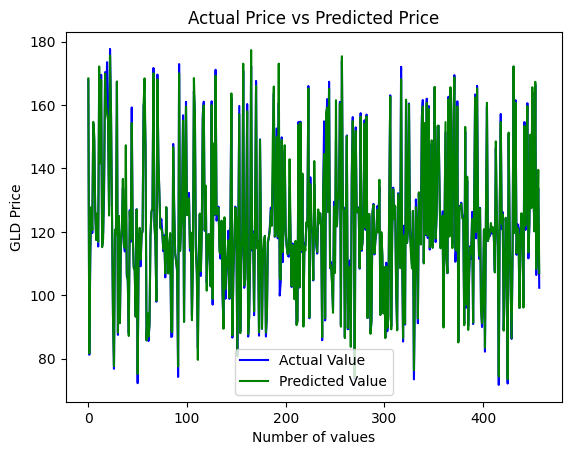

In [66]:
#Plot graph between actual and predicted price
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [67]:
#Save model weights
import joblib
joblib.dump(regressor,"model.joblib")

['model.joblib']

In [ ]:
#python main.py --SPX 1447.160034, --USO 78.470001, --USD 1.471, --SLV 12.3